#### Import the required modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc,recall_score


#### Load the data

In [3]:
PATH='/home/datasets/lab/CSE7221o/Data_AE/'
data1=pd.read_csv(PATH+"BackOrders.csv")
data1.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No


In [4]:
# Check data type of each attribute
data1.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

#### Convert all the attributes to appropriate type

Data type conversion

    Using astype('category') to convert potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder attributes to categorical attributes.


In [5]:
for col in ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
    data1[col] = data1[col].astype('category')

##### Display data type of each variable

In [6]:
#Display data type of each variable
data1.dtypes

sku                     int64
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

In [7]:
#### Delete sku attribute
np.size(np.unique(data1.sku, return_counts=True)[0])

61589

In [8]:
data1.drop('sku', axis=1, inplace=True)

In [9]:
#### Missing value analysis and dropping the records with missing values
data1.isnull().sum()

national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [10]:
#Since the number of missing values is about 5%. For initial analysis we ignore all these records
data1 = data1.dropna(axis=0)

#### For neural networks we require the data to be in numeric form

In [11]:
cat_attr= ['potential_issue', 'deck_risk', 'oe_constraint',
           'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
num_attr=data1.columns.difference(cat_attr)
cat_attr.pop()

print(num_attr)

print("\n")
print(cat_attr)

Index(['forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'in_transit_qty', 'lead_time', 'local_bo_qty', 'min_bank',
       'national_inv', 'perf_12_month_avg', 'perf_6_month_avg',
       'pieces_past_due', 'sales_1_month', 'sales_3_month', 'sales_6_month',
       'sales_9_month'],
      dtype='object')


['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


#### Data preprocessing for numeric and categorical using pipelines

In [12]:
#Performing train test split on the data
X, y = data1.loc[:,data1.columns!='went_on_backorder'], data1.loc[:,'went_on_backorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [13]:
y_test=y_test.replace({'Yes':1,'No':0})
y_train=y_train.replace({'Yes':1,'No':0})

In [14]:
for col in cat_attr:
    X_train[col]=X_train[col].replace({'Yes':1,'No':0})
    X_test[col]=X_test[col].replace({'Yes':1,'No':0})
    

print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    33067
1     7663
Name: went_on_backorder, dtype: int64
0    14150
1     3306
Name: went_on_backorder, dtype: int64


In [15]:
X_train.to_pickle('x_train')
X_test.to_pickle('x_test')
y_train.to_pickle('y_train')
y_test.to_pickle('y_test')

In [16]:
sample=pd.read_pickle('x_train')
sample.head(3)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
24039,479,8.0,0,0,0,0,0,0,0,0,...,0,0,0.83,0.91,0,0,0,1,1,0
12800,3,12.0,0,36,46,56,12,23,39,56,...,0,0,0.82,0.79,0,0,0,1,1,0
59501,1,5.0,0,2,3,5,2,2,4,6,...,0,0,0.99,0.97,0,0,0,0,1,0


In [17]:
import os

In [18]:
## Convert to numeric
y_train=y_train.values
y_test=y_test.values

In [19]:
train=X_train.values
test=X_test.values

In [20]:
print(train.shape)

print(test.shape)


(40730, 21)
(17456, 21)


In [21]:
mlp_model = Sequential()

mlp_model.add(Dense(16, input_dim=21, activation='tanh'))
mlp_model.add(Dense(1, activation='sigmoid'))

In [22]:
mlp_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
x=mlp_model.fit(train, y_train, epochs=50, batch_size=32,validation_split=0.2)

Epoch 1/50
1019/1019 [==============================] - 3s 2ms/step - loss: 0.5046 - accuracy: 0.7277 - val_loss: 0.2888 - val_accuracy: 0.8758
Epoch 2/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2719 - accuracy: 0.8806 - val_loss: 0.2656 - val_accuracy: 0.8899
Epoch 3/50
1019/1019 [==============================] - 2s 1ms/step - loss: 0.2616 - accuracy: 0.8886 - val_loss: 0.2605 - val_accuracy: 0.8904
Epoch 4/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2543 - accuracy: 0.8949 - val_loss: 0.2572 - val_accuracy: 0.8904
Epoch 5/50
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2569 - accuracy: 0.8915 - val_loss: 0.2543 - val_accuracy: 0.8957
Epoch 6/50
1019/1019 [==============================] - 2s 1ms/step - loss: 0.2500 - accuracy: 0.8939 - val_loss: 0.2603 - val_accuracy: 0.8895
Epoch 7/50
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2457 - accuracy: 0.8964 - val_loss: 0.2490 - val_accuracy:

In [23]:
x.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

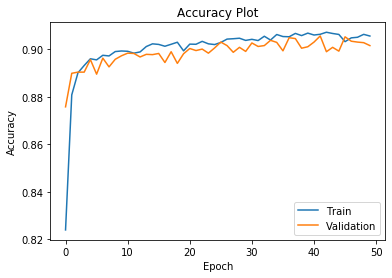

In [24]:
import matplotlib.pyplot as plt
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

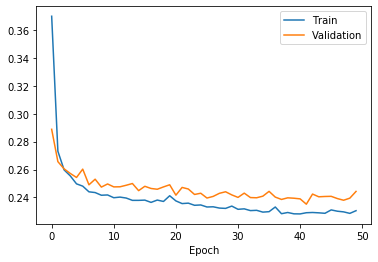

In [25]:
import matplotlib.pyplot as plt
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
#plt.title('Accuracy Plot')
#plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [26]:
mlp_model.predict(test)

array([[0.01766703],
       [0.01766703],
       [0.00297815],
       ...,
       [0.01113436],
       [0.05869928],
       [0.00296283]], dtype=float32)

#### Predictions

In [27]:
test_pred=mlp_model.predict(test)>0.5
train_pred=mlp_model.predict(train)>0.5

In [28]:
confusion_matrix(y_train, train_pred)

array([[31635,  1432],
       [ 2425,  5238]])

In [29]:
confusion_matrix(y_test, test_pred)

array([[13529,   621],
       [ 1034,  2272]])

In [30]:
from sklearn.metrics import accuracy_score,recall_score
print("Train accuracy",accuracy_score(y_train,train_pred))
      
print("Test accuracy",accuracy_score(y_test,test_pred))

Train accuracy 0.9053032163024798
Test accuracy 0.9051901924839597


In [31]:
print(" Train Recall",recall_score(y_train,train_pred))
      
print("Test Recall",recall_score(y_test,test_pred))

 Train Recall 0.6835443037974683
Test Recall 0.6872353297035693


In [32]:
print(pd.value_counts(y_train,normalize=True))
print(pd.value_counts(y_test,normalize=True))

0    0.811859
1    0.188141
dtype: float64
0    0.81061
1    0.18939
dtype: float64


In [33]:
### Continue with Experimets - MLP

In [34]:
import keras
from keras.layers import Input
from keras.models import Model

ip=Input(shape=(21,))

x=Dense(16,activation='relu')(ip)
x=Dense(16,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp2=Model(ip,output)
mlp2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                352       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [35]:
mlp2.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy') #[keras.metrics.Recall()]
x=mlp2.fit(train, y_train, epochs=50, batch_size=32,validation_split=0.2)


Epoch 1/50
1019/1019 [==============================] - 2s 2ms/step - loss: 4.5352 - accuracy: 0.8195 - val_loss: 6.1143 - val_accuracy: 0.8653
Epoch 2/50
1019/1019 [==============================] - 2s 2ms/step - loss: 1.5280 - accuracy: 0.8664 - val_loss: 1.5429 - val_accuracy: 0.8766
Epoch 3/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.8779 - val_loss: 1.7921 - val_accuracy: 0.8727
Epoch 4/50
1019/1019 [==============================] - 2s 2ms/step - loss: 1.2360 - accuracy: 0.8659 - val_loss: 1.2273 - val_accuracy: 0.8510
Epoch 5/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.7776 - accuracy: 0.8625 - val_loss: 1.6836 - val_accuracy: 0.8825
Epoch 6/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.9340 - accuracy: 0.8796 - val_loss: 0.8419 - val_accuracy: 0.8799
Epoch 7/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.8623 - accuracy: 0.8735 - val_loss: 0.6158 - val_accuracy:

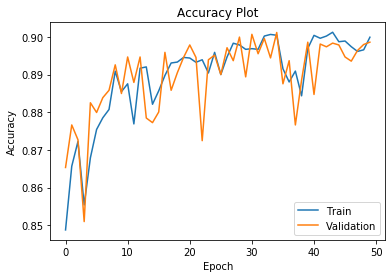

In [36]:
import matplotlib.pyplot as plt
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [37]:
test_pred=mlp2.predict(test)>0.5
train_pred=mlp2.predict(train)>0.5
print("Mlp with 2 layers and Ada")
print("Train accuracy",accuracy_score(y_train,train_pred))
print("Test accuracy",accuracy_score(y_test,test_pred))

print(" Train Recall",recall_score(y_train,train_pred))      
print("Test Recall",recall_score(y_test,test_pred))

Mlp with 2 layers and Ada
Train accuracy 0.9018413945494721
Test accuracy 0.9027841429880843
 Train Recall 0.7460524598721128
Test Recall 0.7525710828796128


#### With another activation 'swish'
* ref: https://www.tensorflow.org/api_docs/python/tf/keras/activations/swish

In [38]:
import keras
from keras.layers import Input
from keras.models import Model

ip=Input(shape=(21,))

x=Dense(8,activation='swish')(ip)
x=Dense(8,activation='swish')(x)
output=Dense(1,activation='sigmoid')(x)

mlp3=Model(ip,output)
mlp3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 176       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [39]:
mlp3.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy') #[keras.metrics.Recall()]
history1=mlp3.fit(train, y_train, epochs=50, batch_size=32,validation_split=0.2)
history1

Epoch 1/50
1019/1019 [==============================] - 2s 2ms/step - loss: 4.1337 - accuracy: 0.8103 - val_loss: 13.8829 - val_accuracy: 0.8583
Epoch 2/50
1019/1019 [==============================] - 1s 1ms/step - loss: 3.4830 - accuracy: 0.8671 - val_loss: 3.5080 - val_accuracy: 0.8581
Epoch 3/50
1019/1019 [==============================] - 2s 2ms/step - loss: 1.9443 - accuracy: 0.8671 - val_loss: 9.7757 - val_accuracy: 0.8597
Epoch 4/50
1019/1019 [==============================] - 2s 2ms/step - loss: 1.4159 - accuracy: 0.8705 - val_loss: 0.9124 - val_accuracy: 0.8700
Epoch 5/50
1019/1019 [==============================] - 2s 2ms/step - loss: 1.3784 - accuracy: 0.8647 - val_loss: 8.4256 - val_accuracy: 0.8620
Epoch 6/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.9241 - accuracy: 0.8656 - val_loss: 2.5648 - val_accuracy: 0.8378
Epoch 7/50
1019/1019 [==============================] - 2s 2ms/step - loss: 1.6368 - accuracy: 0.8673 - val_loss: 2.6841 - val_accuracy

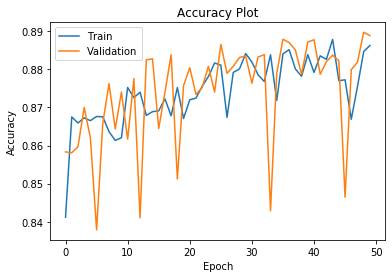

In [40]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [41]:
test_pred=mlp3.predict(test)>0.5
train_pred=mlp3.predict(train)>0.5
#print("Mlp with 2 layers and swish")
print("Train accuracy",accuracy_score(y_train,train_pred))
print("Test accuracy",accuracy_score(y_test,test_pred))

print(" Train Recall",recall_score(y_train,train_pred))      
print("Test Recall",recall_score(y_test,test_pred))

Train accuracy 0.8894917751043457
Test accuracy 0.8897800183318056
 Train Recall 0.6759754665274696
Test Recall 0.690260133091349


### Increase the depth of the model
* No of layers-5 layers with 8,8,16,32 neurons respectively 
* Hidden activation 'relu' and output activation 'sigmoid
* optimizer ; Adam,swish

In [42]:

ip=Input(shape=(21,))
x=Dense(8,activation='relu')(ip)
x=Dense(8,activation='relu')(x)
x=Dense(16,activation='relu')(x)
x=Dense(32,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp4=Model(ip,output)
mlp4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 176       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 969
Trainable params: 969
Non-trainable params: 0
_____________________________________________________________

In [43]:
mlp4.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy') #[keras.metrics.Recall()]
history1=mlp4.fit(train, y_train, epochs=50, batch_size=32,validation_split=0.2)


Epoch 1/50
1019/1019 [==============================] - 3s 2ms/step - loss: 1.5073 - accuracy: 0.8325 - val_loss: 3.1217 - val_accuracy: 0.8262
Epoch 2/50
1019/1019 [==============================] - 2s 2ms/step - loss: 1.8439 - accuracy: 0.8469 - val_loss: 0.4994 - val_accuracy: 0.8377
Epoch 3/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.6050 - accuracy: 0.8380 - val_loss: 0.7044 - val_accuracy: 0.8722
Epoch 4/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4420 - accuracy: 0.8644 - val_loss: 0.5884 - val_accuracy: 0.8623
Epoch 5/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5817 - accuracy: 0.8714 - val_loss: 0.4507 - val_accuracy: 0.8747
Epoch 6/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.3942 - accuracy: 0.8799 - val_loss: 0.4016 - val_accuracy: 0.8840
Epoch 7/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4861 - accuracy: 0.8762 - val_loss: 0.2912 - val_accuracy:

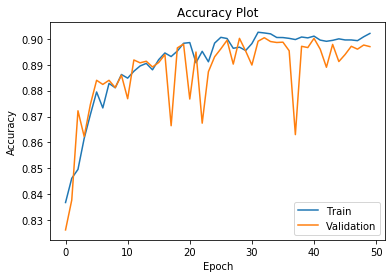

In [44]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [45]:
test_pred=mlp4.predict(test)>0.5
train_pred=mlp4.predict(train)>0.5

print("Train accuracy",accuracy_score(y_train,train_pred))
print("Test accuracy",accuracy_score(y_test,test_pred))

print(" Train Recall",recall_score(y_train,train_pred))      
print("Test Recall",recall_score(y_test,test_pred))

Train accuracy 0.9019641541861037
Test accuracy 0.9013519706691109
 Train Recall 0.7940754273783114
Test Recall 0.7894736842105263


In [46]:
# Change the kernel initializer- Xavier initialization
ip=Input(shape=(21,))
x=Dense(8,activation='relu',kernel_initializer='glorot_normal')(ip)
x=Dense(8,activation='relu')(x)
x=Dense(16,activation='relu')(x)
x=Dense(32,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp5=Model(ip,output)

mlp5.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy') #[keras.metrics.Recall()]
history1=mlp5.fit(train, y_train, epochs=50, batch_size=32,validation_split=0.2)


Epoch 1/50
1019/1019 [==============================] - 3s 2ms/step - loss: 9.2750 - accuracy: 0.6924 - val_loss: 0.7510 - val_accuracy: 0.8187
Epoch 2/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.9464 - accuracy: 0.8287 - val_loss: 0.4948 - val_accuracy: 0.8448
Epoch 3/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4381 - accuracy: 0.8588 - val_loss: 0.7100 - val_accuracy: 0.8429
Epoch 4/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.5415 - accuracy: 0.8328 - val_loss: 0.5980 - val_accuracy: 0.8386
Epoch 5/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.3880 - accuracy: 0.8585 - val_loss: 0.3444 - val_accuracy: 0.8671
Epoch 6/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4258 - accuracy: 0.8647 - val_loss: 0.4285 - val_accuracy: 0.8629
Epoch 7/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.3415 - accuracy: 0.8729 - val_loss: 0.3368 - val_accuracy:

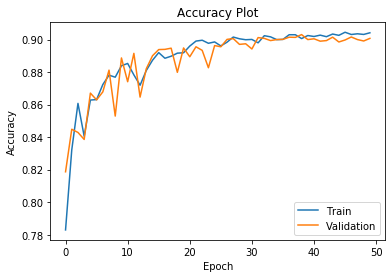

In [47]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


In [48]:
test_pred=mlp5.predict(test)>0.5
train_pred=mlp5.predict(train)>0.5


print("Train accuracy",accuracy_score(y_train,train_pred))
print("Test accuracy",accuracy_score(y_test,test_pred))

print(" Train Recall",recall_score(y_train,train_pred))      
print("Test Recall",recall_score(y_test,test_pred))

Train accuracy 0.9037809968082494
Test accuracy 0.9035288725939505
 Train Recall 0.7206055069815999
Test Recall 0.7171808832425892


#### Try variety of activations in the hidden layers

In [49]:

ip=Input(shape=(21,))
x=Dense(16,activation='tanh',kernel_initializer='glorot_normal')(ip)
x=Dense(16,activation='tanh')(x)
x=Dense(32,activation='relu')(x)
x=Dense(32,activation='relu')(x)
x=Dense(64,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp7=Model(ip,output)

mlp7.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy') #[keras.metrics.Recall()]
history1=mlp7.fit(train, y_train, epochs=50, batch_size=32,validation_split=0.2)


Epoch 1/50
1019/1019 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8419 - val_loss: 0.2937 - val_accuracy: 0.8608
Epoch 2/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2644 - accuracy: 0.8814 - val_loss: 0.2708 - val_accuracy: 0.8829
Epoch 3/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2532 - accuracy: 0.8910 - val_loss: 0.2537 - val_accuracy: 0.8928
Epoch 4/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2453 - accuracy: 0.8964 - val_loss: 0.2526 - val_accuracy: 0.8955
Epoch 5/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2440 - accuracy: 0.8973 - val_loss: 0.2579 - val_accuracy: 0.8904
Epoch 6/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2384 - accuracy: 0.8979 - val_loss: 0.2463 - val_accuracy: 0.8987
Epoch 7/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2396 - accuracy: 0.8992 - val_loss: 0.2471 - val_accuracy:

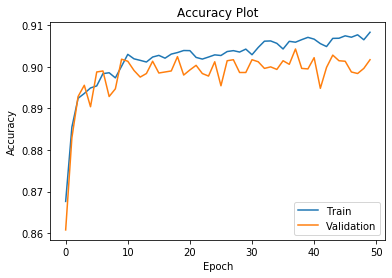

In [50]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [51]:
test_pred=mlp7.predict(test)>0.5
train_pred=mlp7.predict(train)>0.5


print("Train accuracy",accuracy_score(y_train,train_pred))
print("Test accuracy",accuracy_score(y_test,test_pred))

print(" Train Recall",recall_score(y_train,train_pred))      
print("Test Recall",recall_score(y_test,test_pred))

Train accuracy 0.9079548244537197
Test accuracy 0.9055912007332723
 Train Recall 0.708077776327809
Test Recall 0.7032667876588021


# How to save model -
Save Model Weights and Architecture Together
Keras also supports a simpler interface to save both the model weights and model architecture together into a single H5 file.

Saving the model in this way includes everything we need to know about the model, including:

    * Model weights.
    * Model architecture.
    * Model compilation details (loss and metrics).
    * Model optimizer state.
This means that we can load and use the model directly, without having to re-compile.

In [52]:
mlp2.save("./Backorder.h5")

# Load the model
* By calling the load_model() function and passing the filename. The function returns the model with the same architecture and weights.

In [53]:
from keras.models import load_model
saved_best_model = load_model('Backorder.h5')
# summarize model.
saved_best_model.summary() 


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                352       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [54]:
saved_best_model.predict(X_test)[0:5]

array([[0.1607539 ],
       [0.1607539 ],
       [0.0026814 ],
       [0.08486387],
       [0.81314534]], dtype=float32)

### Can we save the model during training

### Yes - use Model Checkpoint from Callbacks api
* What if we want to save the best model during training at certain epoch
    * save_best_only=True
* You can save the model at every epoch 
    * name of the file in the format 'model.{epoch:02d'}.h5'
    * save_freq = 'epoch' default
* You can save the best model 
    * name of the file in the format 'model_name.h5'
    * save_best=True
* You can save the model at every batch
    * save_freq= integer #  the callback saves the model at end of this many batches

In [55]:
from keras.callbacks import ModelCheckpoint

In [56]:
# Create a SavedModels_Backorders folder in the current directory and continue with loaded model for further training-experimentation
temp='./SavedModels_Backorders/'
model_checkpoint = ModelCheckpoint(filepath=temp+'back.{epoch:02d}.h5',verbose=1) # 'model.{epoch:02d}-{val_loss:.2f}.h5'


In [57]:
callback = [model_checkpoint]
saved_best_model.fit(train,y_train,callbacks=callback,epochs=2,validation_split=0.2)
# Check the temp path you might see two saved models.

Epoch 1/2
1019/1019 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.8987 - val_loss: 0.3414 - val_accuracy: 0.8987

Epoch 00001: saving model to ./SavedModels_Backorders/back.01.h5
Epoch 2/2
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.9027 - val_loss: 0.2576 - val_accuracy: 0.9000

Epoch 00002: saving model to ./SavedModels_Backorders/back.02.h5


## Can we stop the training when there is no improvement after few epochs
### Early Stopping
    * patience -Number of epochs with no improvement after which training will be stopped.


In [58]:
from keras.callbacks import EarlyStopping
model_checkpoint = ModelCheckpoint(filepath=temp+'back_best.h5',save_best_only=True,verbose=1) # 'model.{epoch:02d}-{val_loss:.2f}.h5'
early_stopping = EarlyStopping(patience=5,verbose=1)#min_delta=0.001

In [59]:
callback = [model_checkpoint,early_stopping]
history1=saved_best_model.fit(train,y_train,callbacks=callback,epochs=100,validation_split=0.2)


Epoch 1/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2568 - accuracy: 0.9042 - val_loss: 0.2583 - val_accuracy: 0.8979

Epoch 00001: val_loss improved from inf to 0.25829, saving model to ./SavedModels_Backorders/back_best.h5
Epoch 2/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2577 - accuracy: 0.9008 - val_loss: 0.2542 - val_accuracy: 0.8980

Epoch 00002: val_loss improved from 0.25829 to 0.25417, saving model to ./SavedModels_Backorders/back_best.h5
Epoch 3/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2420 - accuracy: 0.9042 - val_loss: 0.2945 - val_accuracy: 0.8974

Epoch 00003: val_loss did not improve from 0.25417
Epoch 4/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2566 - accuracy: 0.8984 - val_loss: 0.5756 - val_accuracy: 0.8973

Epoch 00004: val_loss did not improve from 0.25417
Epoch 5/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2984 - accuracy: 0.

In [60]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

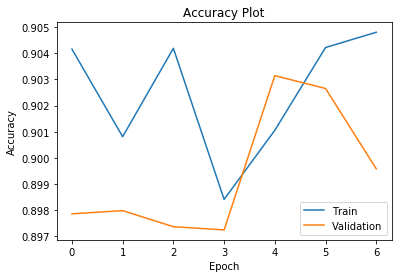

In [61]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

## Can we Reduce Learning Rate when the metric has stopped improving
###  ReduceLROnPlateau 
    * Reduce learning rate when a metric has stopped improving.
    * Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
    * This callback monitors a quantity and if no improvement is seen for 'patience' number of epochs,the learning rate is reduced.


In [62]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=5, min_lr=0.0001)
callback = [model_checkpoint,early_stopping,reduce_lr]
history1=saved_best_model.fit(train,y_train,callbacks=callback,epochs=100,validation_split=0.2)

Epoch 1/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2397 - accuracy: 0.9043 - val_loss: 0.3232 - val_accuracy: 0.8990

Epoch 00001: val_loss did not improve from 0.25417
Epoch 2/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2454 - accuracy: 0.9042 - val_loss: 0.2511 - val_accuracy: 0.9024

Epoch 00002: val_loss improved from 0.25417 to 0.25107, saving model to ./SavedModels_Backorders/back_best.h5
Epoch 3/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.2397 - accuracy: 0.9046 - val_loss: 0.3047 - val_accuracy: 0.9012

Epoch 00003: val_loss did not improve from 0.25107
Epoch 4/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2614 - accuracy: 0.9025 - val_loss: 0.2525 - val_accuracy: 0.9012

Epoch 00004: val_loss did not improve from 0.25107
Epoch 5/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.2504 - accuracy: 0.9038 - val_loss: 0.2562 - val_accuracy: 0.9034

Epoch 0

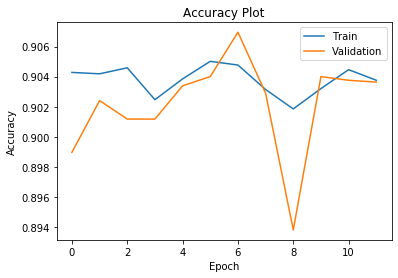

In [63]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### How to reduce Overfitting
     * Drop out
     * Batch Normaliztion

In [64]:
ip=Input(shape=(21,))
x=Dense(64,activation='relu')(ip)

x=Dense(64,activation='relu')(x)
x=Dense(32,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp_dropout = Model(ip,output)

In [65]:
temp='./Droput_exp'
model_checkpoint = ModelCheckpoint(filepath=temp+'back_best.h5',verbose=1) # 'model.{epoch:02d}-{val_loss:.2f}.h5'
early_stopping = EarlyStopping(patience=5,verbose=1)
callback = [model_checkpoint,early_stopping]
mlp_dropout.compile(optimizer='Adam',loss=keras.losses.binary_crossentropy,metrics='accuracy')
history1=mlp_dropout.fit(train,y_train,batch_size=32,callbacks=callback,validation_split=0.2,epochs=100)

Epoch 1/100
1019/1019 [==============================] - 3s 2ms/step - loss: 4.4608 - accuracy: 0.8381 - val_loss: 3.2013 - val_accuracy: 0.8723

Epoch 00001: saving model to ./Droput_expback_best.h5
Epoch 2/100
1019/1019 [==============================] - 2s 2ms/step - loss: 3.0445 - accuracy: 0.8688 - val_loss: 0.4551 - val_accuracy: 0.8845

Epoch 00002: saving model to ./Droput_expback_best.h5
Epoch 3/100
1019/1019 [==============================] - 2s 2ms/step - loss: 1.5808 - accuracy: 0.8770 - val_loss: 0.4254 - val_accuracy: 0.8868

Epoch 00003: saving model to ./Droput_expback_best.h5
Epoch 4/100
1019/1019 [==============================] - 2s 2ms/step - loss: 1.2434 - accuracy: 0.8680 - val_loss: 3.1135 - val_accuracy: 0.7963

Epoch 00004: saving model to ./Droput_expback_best.h5
Epoch 5/100
1019/1019 [==============================] - 2s 2ms/step - loss: 1.1611 - accuracy: 0.8707 - val_loss: 0.5008 - val_accuracy: 0.8920

Epoch 00005: saving model to ./Droput_expback_best.h5


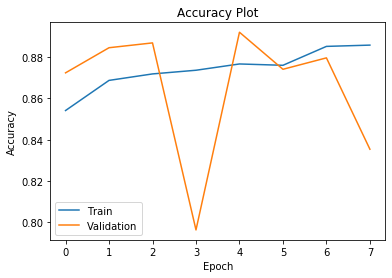

In [66]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

In [67]:
from keras.layers import Dropout
ip=Input(shape=(21,))
x=Dense(64,activation='relu')(ip)
x=Dropout(0.1)(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.1)(x)
x=Dense(32,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp_dropout = Model(ip,output)

In [68]:
temp='./Droput_exp'
model_checkpoint = ModelCheckpoint(filepath=temp+'back_best.h5',verbose=1) # 'model.{epoch:02d}-{val_loss:.2f}.h5'
early_stopping = EarlyStopping(patience=5,verbose=1)
callback = [model_checkpoint,early_stopping]
mlp_dropout.compile(optimizer='Adam',loss=keras.losses.binary_crossentropy,metrics='accuracy')
history1=mlp_dropout.fit(train,y_train,batch_size=32,callbacks=callback,validation_split=0.2,epochs=100)

Epoch 1/100
1019/1019 [==============================] - 3s 2ms/step - loss: 5.2306 - accuracy: 0.8241 - val_loss: 5.7998 - val_accuracy: 0.8545

Epoch 00001: saving model to ./Droput_expback_best.h5
Epoch 2/100
1019/1019 [==============================] - 2s 2ms/step - loss: 3.1433 - accuracy: 0.8522 - val_loss: 1.9576 - val_accuracy: 0.8705

Epoch 00002: saving model to ./Droput_expback_best.h5
Epoch 3/100
1019/1019 [==============================] - 2s 2ms/step - loss: 1.5727 - accuracy: 0.8473 - val_loss: 1.6819 - val_accuracy: 0.8810

Epoch 00003: saving model to ./Droput_expback_best.h5
Epoch 4/100
1019/1019 [==============================] - 2s 2ms/step - loss: 1.9597 - accuracy: 0.8625 - val_loss: 1.6964 - val_accuracy: 0.8864

Epoch 00004: saving model to ./Droput_expback_best.h5
Epoch 5/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.6205 - accuracy: 0.8668 - val_loss: 1.3493 - val_accuracy: 0.8826

Epoch 00005: saving model to ./Droput_expback_best.h5


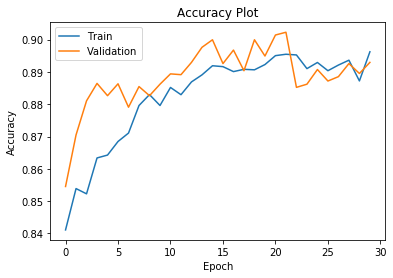

In [69]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

In [70]:
from keras.layers import Dropout,BatchNormalization,Activation
ip=Input(shape=(21,))
x=Dense(64)(ip)
x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
#x=Dropout(0.1)(x)
x=Dense(64)(x)
x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
#x=Dropout(0.1)(x)
x=Dense(32,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp_dropout_bn = Model(ip,output)

In [71]:
temp='./Droput_exp_bn'
model_checkpoint = ModelCheckpoint(filepath=temp+'back_best.h5',verbose=1) # 'model.{epoch:02d}-{val_loss:.2f}.h5'
early_stopping = EarlyStopping(patience=5,verbose=1)
callback = [model_checkpoint,early_stopping]
mlp_dropout_bn.compile(optimizer='Adam',loss=keras.losses.binary_crossentropy,metrics='accuracy')
history1=mlp_dropout_bn.fit(train,y_train,batch_size=32,callbacks=callback,validation_split=0.2,epochs=100)

Epoch 1/100
1019/1019 [==============================] - 4s 3ms/step - loss: 0.4197 - accuracy: 0.8156 - val_loss: 0.6254 - val_accuracy: 0.8117

Epoch 00001: saving model to ./Droput_exp_bnback_best.h5
Epoch 2/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.3479 - accuracy: 0.8515 - val_loss: 0.6854 - val_accuracy: 0.8118

Epoch 00002: saving model to ./Droput_exp_bnback_best.h5
Epoch 3/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.3380 - accuracy: 0.8529 - val_loss: 0.7945 - val_accuracy: 0.8111

Epoch 00003: saving model to ./Droput_exp_bnback_best.h5
Epoch 4/100
1019/1019 [==============================] - 3s 3ms/step - loss: 0.3398 - accuracy: 0.8519 - val_loss: 0.9822 - val_accuracy: 0.8117

Epoch 00004: saving model to ./Droput_exp_bnback_best.h5
Epoch 5/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.3227 - accuracy: 0.8592 - val_loss: 0.8301 - val_accuracy: 0.8112

Epoch 00005: saving model to ./Droput_exp_

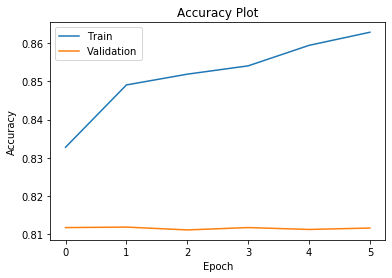

In [72]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

In [73]:
from keras.layers import Dropout,BatchNormalization,Activation
ip=Input(shape=(21,))
x=Dense(64)(ip)
x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
#x=Dropout(0.1)(x)
x=Dense(128)(x)
x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(64,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)

mlp_dropout_bn = Model(ip,output)

In [74]:
temp='./Droput_exp_bn'
model_checkpoint = ModelCheckpoint(filepath=temp+'back_best.h5',verbose=1) # 'model.{epoch:02d}-{val_loss:.2f}.h5'
early_stopping = EarlyStopping(patience=5,verbose=1)
callback = [model_checkpoint,early_stopping]
mlp_dropout_bn.compile(optimizer='Adam',loss=keras.losses.binary_crossentropy,metrics='accuracy')
history1=mlp_dropout_bn.fit(train,y_train,batch_size=32,callbacks=callback,validation_split=0.2,epochs=100)

Epoch 1/100
1019/1019 [==============================] - 4s 3ms/step - loss: 0.4287 - accuracy: 0.8186 - val_loss: 0.6004 - val_accuracy: 0.8124

Epoch 00001: saving model to ./Droput_exp_bnback_best.h5
Epoch 2/100
1019/1019 [==============================] - 2s 2ms/step - loss: 0.3649 - accuracy: 0.8381 - val_loss: 0.7290 - val_accuracy: 0.8121

Epoch 00002: saving model to ./Droput_exp_bnback_best.h5
Epoch 3/100
1019/1019 [==============================] - 3s 3ms/step - loss: 0.3515 - accuracy: 0.8495 - val_loss: 0.7928 - val_accuracy: 0.8117

Epoch 00003: saving model to ./Droput_exp_bnback_best.h5
Epoch 4/100
1019/1019 [==============================] - 3s 3ms/step - loss: 0.3467 - accuracy: 0.8472 - val_loss: 0.8028 - val_accuracy: 0.8117

Epoch 00004: saving model to ./Droput_exp_bnback_best.h5
Epoch 5/100
1019/1019 [==============================] - 3s 3ms/step - loss: 0.3333 - accuracy: 0.8530 - val_loss: 0.6715 - val_accuracy: 0.8124

Epoch 00005: saving model to ./Droput_exp_

In [75]:
test_pred=mlp_dropout.predict(test)>0.5
train_pred=mlp_dropout.predict(train)>0.5


print("Train accuracy",accuracy_score(y_train,train_pred))
print("Test accuracy",accuracy_score(y_test,test_pred))

print(" Train Recall",recall_score(y_train,train_pred))      
print("Test Recall",recall_score(y_test,test_pred))

Train accuracy 0.8958261723545299
Test accuracy 0.8949931255728689
 Train Recall 0.6590108312671278
Test Recall 0.6581972171808832


In [76]:
# Note that the the input data is already standardized,we are Applying BatchNorm on standardized data.
# Instead we can proceed to batch norm without standardization. 
test_pred=mlp_dropout_bn.predict(test)>0.5
train_pred=mlp_dropout_bn.predict(train)>0.5


print("Train accuracy",accuracy_score(y_train,train_pred))
print("Test accuracy",accuracy_score(y_test,test_pred))

print(" Train Recall",recall_score(y_train,train_pred))      
print("Test Recall",recall_score(y_test,test_pred))

Train accuracy 0.8125951387183894
Test accuracy 0.8109532538955087
 Train Recall 0.0054808821610335375
Test Recall 0.003629764065335753
